In [1]:
# We will predict avgdeathsperyear (cancer mortality rate) using various socio-economic and demographic factors.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df= pd.read_csv("cancer_reg.csv")
df

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [4]:
df.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [5]:
df.shape

(3047, 33)

In [6]:
df.info()                      # Check data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [7]:
df.describe()                   # Summary statistics

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


In [8]:
df.isnull().sum()                      # Count of missing values

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [9]:
df.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [10]:
df['pctsomecol18_24'].value_counts()

pctsomecol18_24
43.0    10
42.1     8
42.3     8
45.5     7
36.6     7
        ..
72.7     1
53.2     1
46.5     1
24.8     1
43.9     1
Name: count, Length: 343, dtype: int64

In [11]:
df.drop(['pctsomecol18_24'], axis=1, inplace= True)

In [12]:
df['pctemployed16_over']= df['pctemployed16_over'].fillna(df['pctemployed16_over'].median())

In [13]:
df['pctprivatecoveragealone']= df['pctprivatecoveragealone'].fillna(df['pctprivatecoveragealone'].median())

In [14]:
df.isnull().sum()*100/df.shape[0]

avganncount                0.0
avgdeathsperyear           0.0
target_deathrate           0.0
incidencerate              0.0
medincome                  0.0
popest2015                 0.0
povertypercent             0.0
studypercap                0.0
binnedinc                  0.0
medianage                  0.0
medianagemale              0.0
medianagefemale            0.0
geography                  0.0
percentmarried             0.0
pctnohs18_24               0.0
pcths18_24                 0.0
pctbachdeg18_24            0.0
pcths25_over               0.0
pctbachdeg25_over          0.0
pctemployed16_over         0.0
pctunemployed16_over       0.0
pctprivatecoverage         0.0
pctprivatecoveragealone    0.0
pctempprivcoverage         0.0
pctpubliccoverage          0.0
pctpubliccoveragealone     0.0
pctwhite                   0.0
pctblack                   0.0
pctasian                   0.0
pctotherrace               0.0
pctmarriedhouseholds       0.0
birthrate                  0.0
dtype: f

In [15]:
df[df.duplicated()]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate


In [16]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

In [17]:
cat

['binnedinc', 'geography']

In [18]:
num

['avganncount',
 'avgdeathsperyear',
 'target_deathrate',
 'incidencerate',
 'medincome',
 'popest2015',
 'povertypercent',
 'studypercap',
 'medianage',
 'medianagemale',
 'medianagefemale',
 'percentmarried',
 'pctnohs18_24',
 'pcths18_24',
 'pctbachdeg18_24',
 'pcths25_over',
 'pctbachdeg25_over',
 'pctemployed16_over',
 'pctunemployed16_over',
 'pctprivatecoverage',
 'pctprivatecoveragealone',
 'pctempprivcoverage',
 'pctpubliccoverage',
 'pctpubliccoveragealone',
 'pctwhite',
 'pctblack',
 'pctasian',
 'pctotherrace',
 'pctmarriedhouseholds',
 'birthrate']

In [19]:
df.drop(['geography'], axis=1, inplace= True)

In [21]:
type('binnedinc')   ##split the data 

str

In [22]:
df.drop(['binnedinc'], axis=1, inplace=True)

In [23]:
df

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,48.7,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


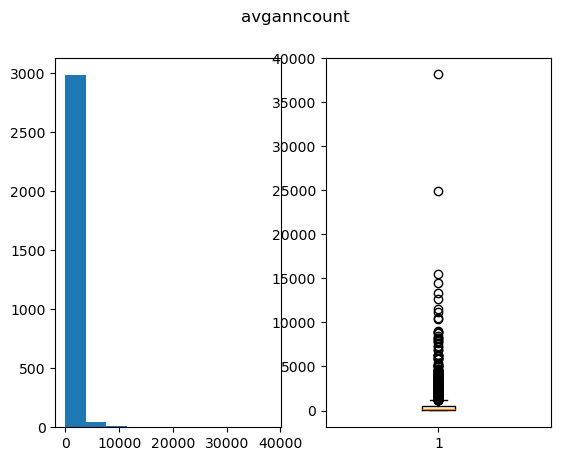

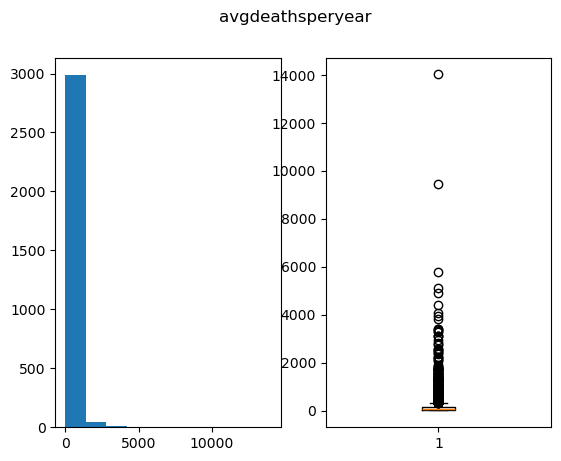

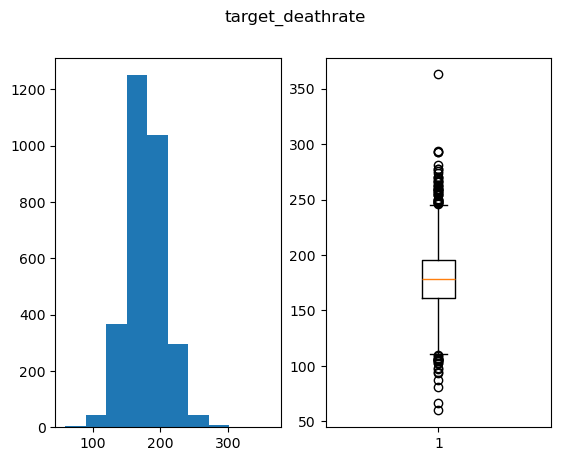

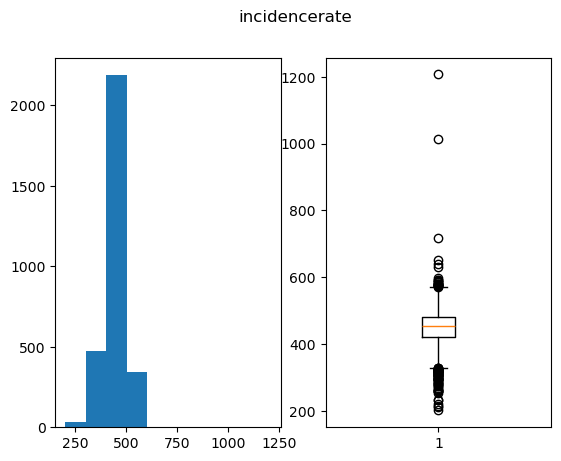

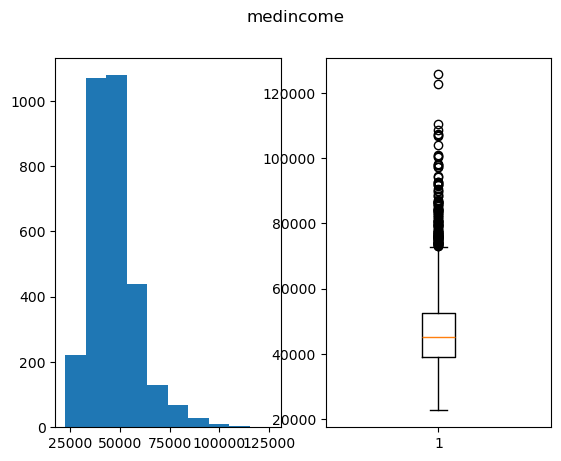

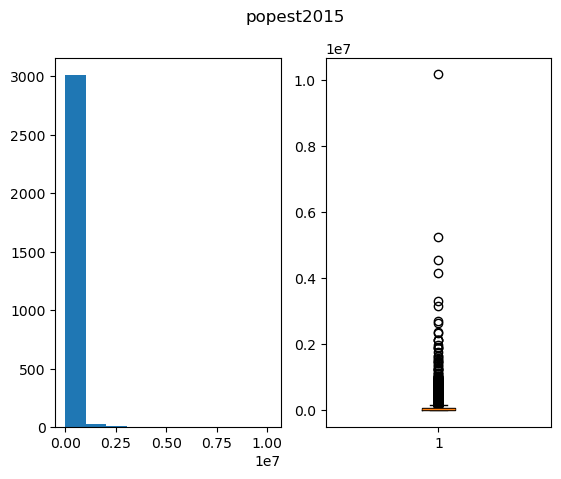

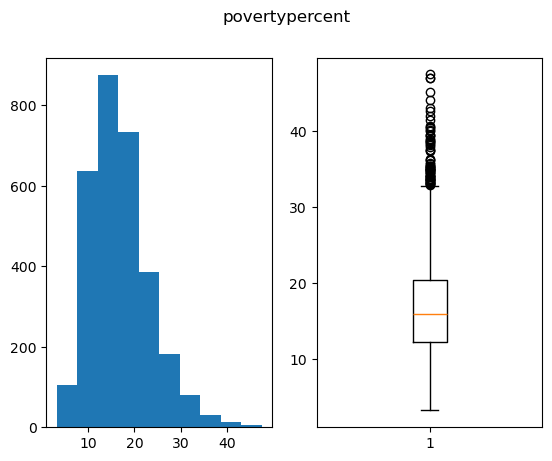

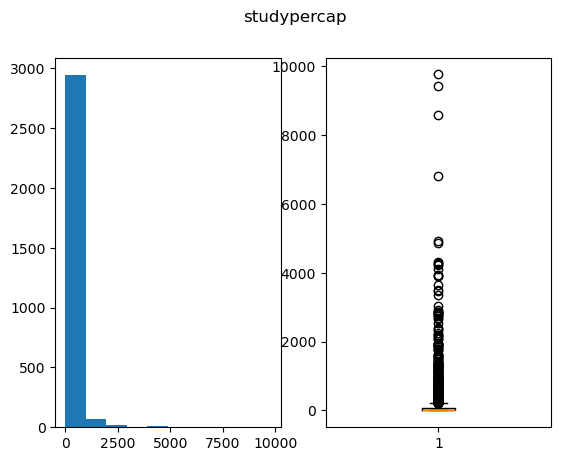

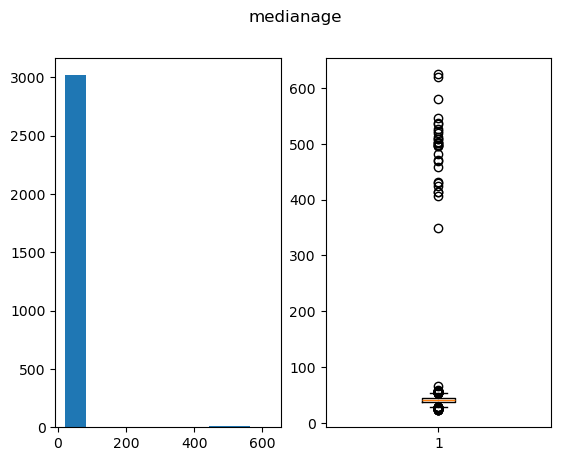

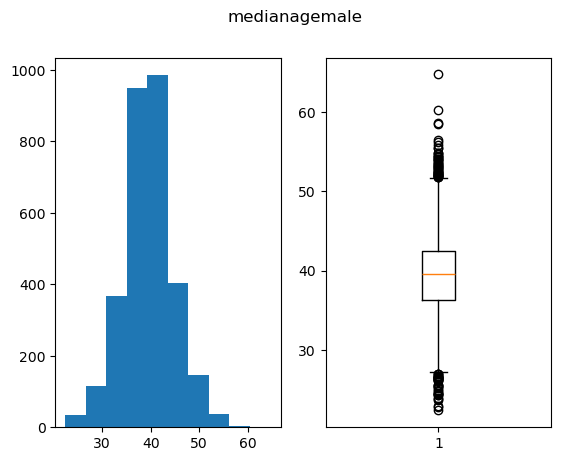

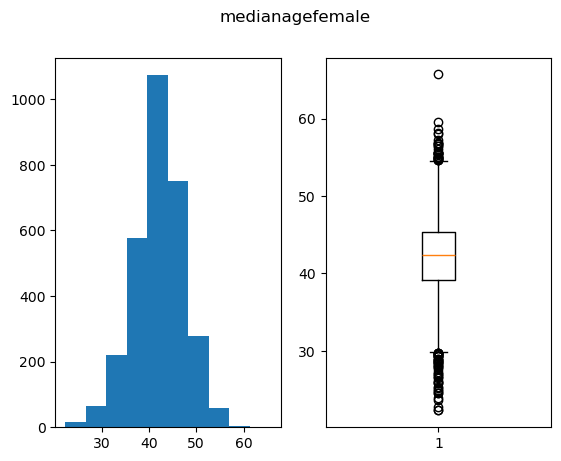

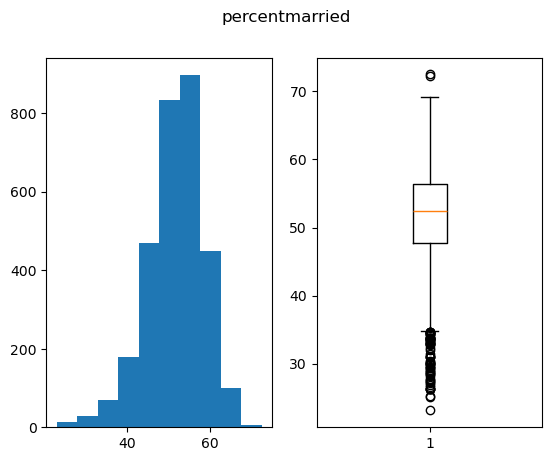

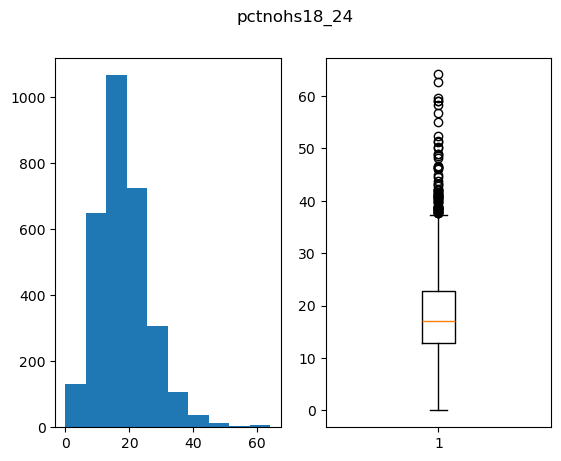

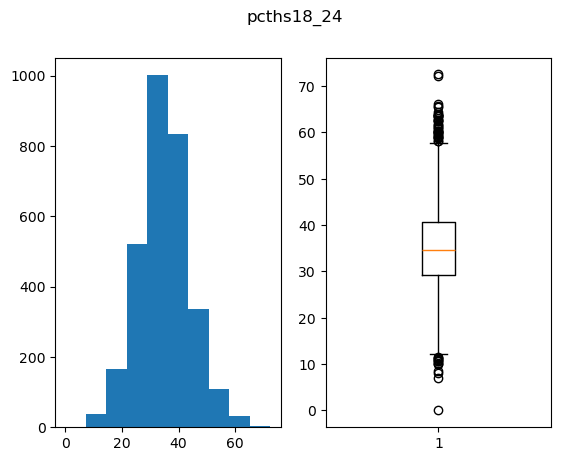

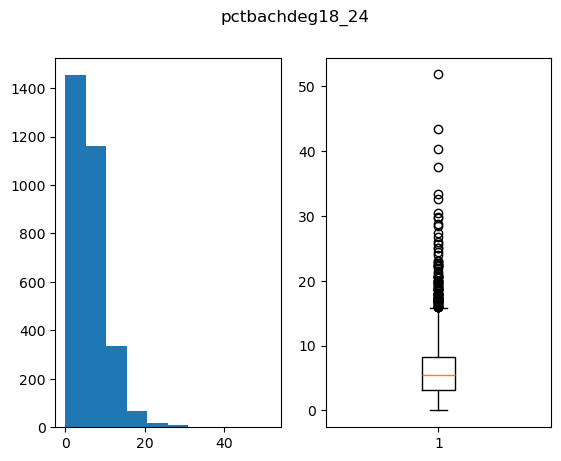

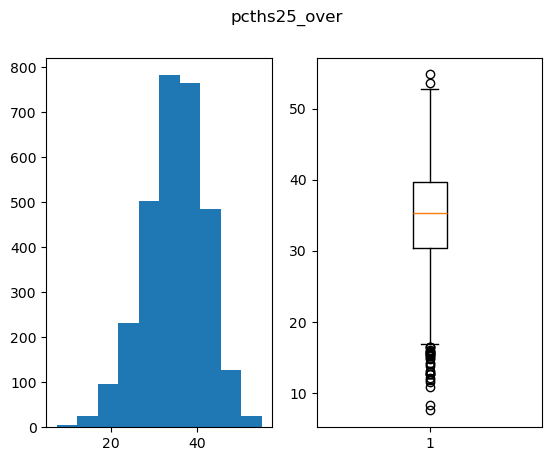

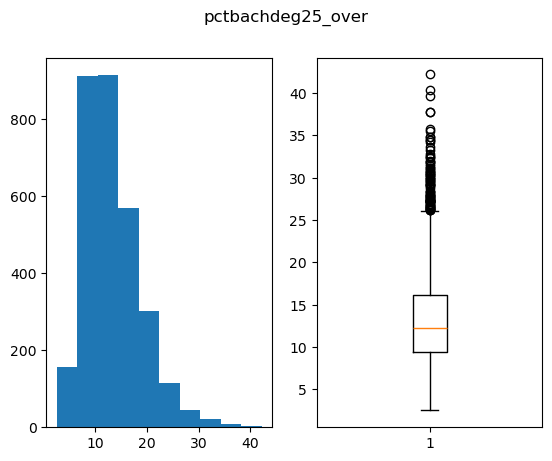

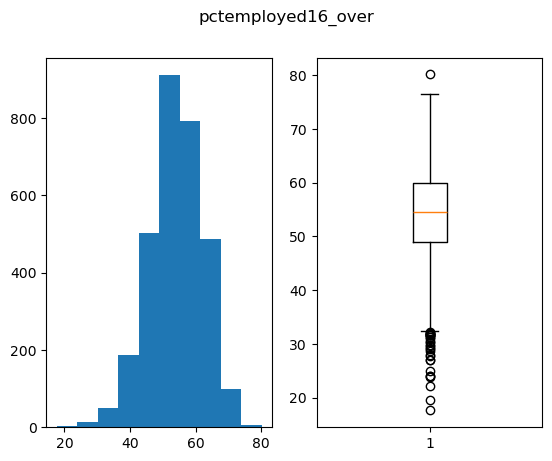

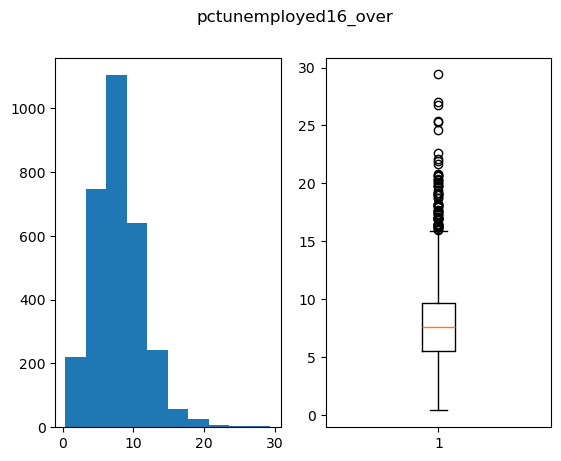

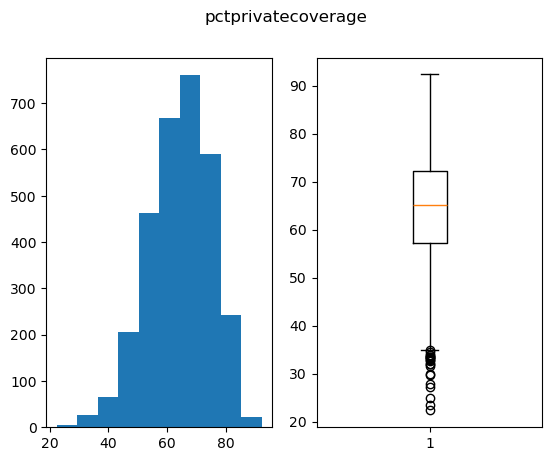

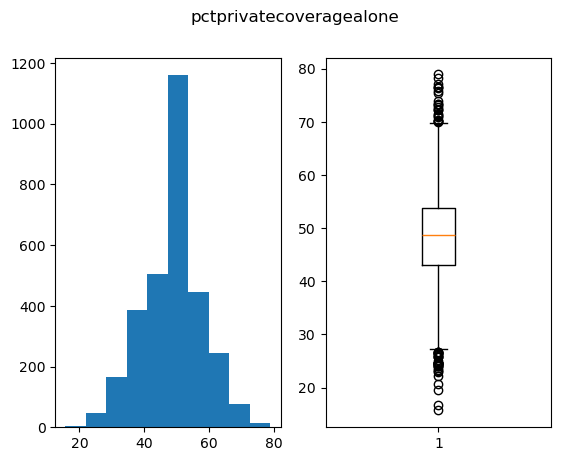

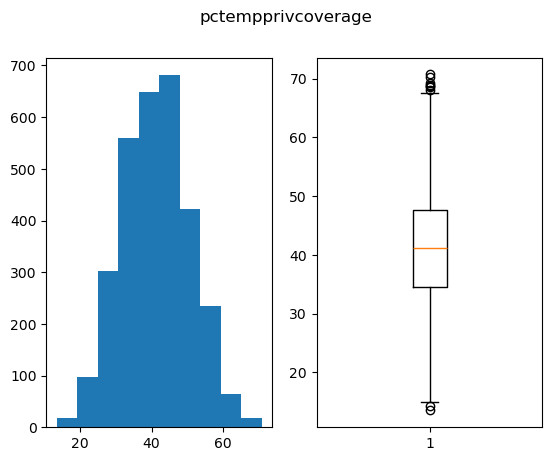

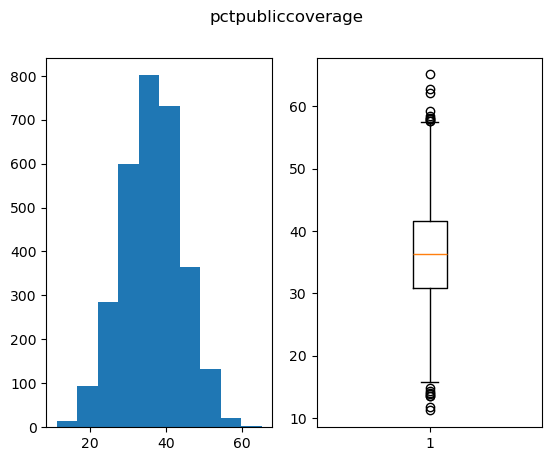

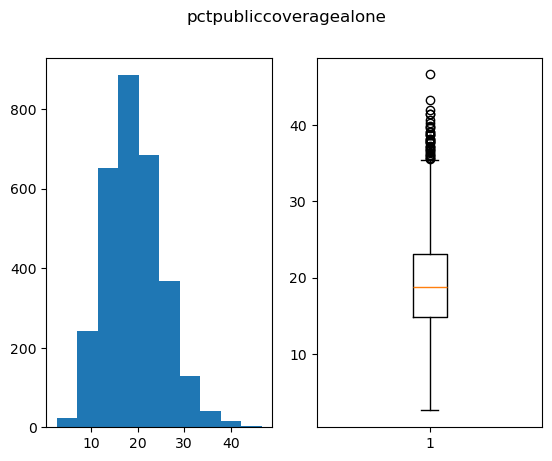

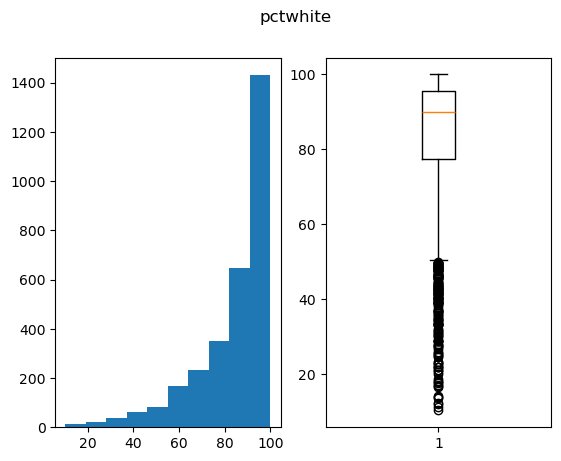

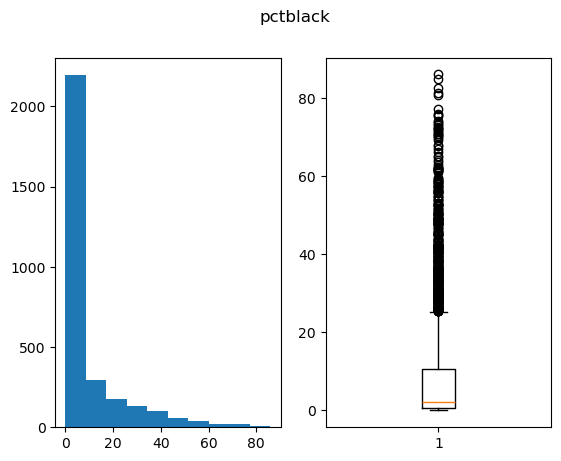

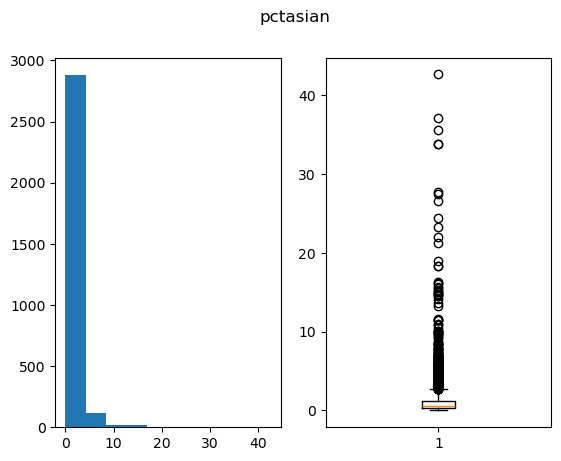

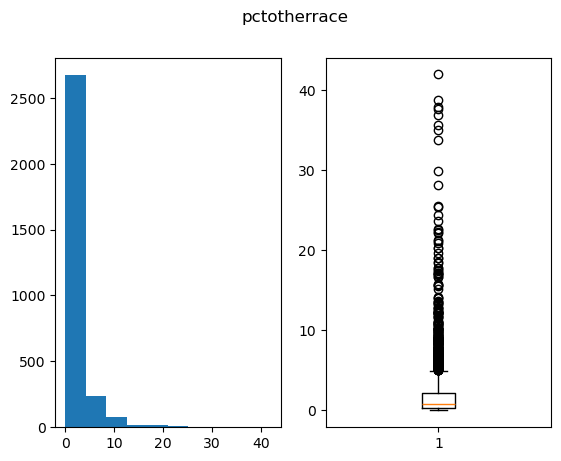

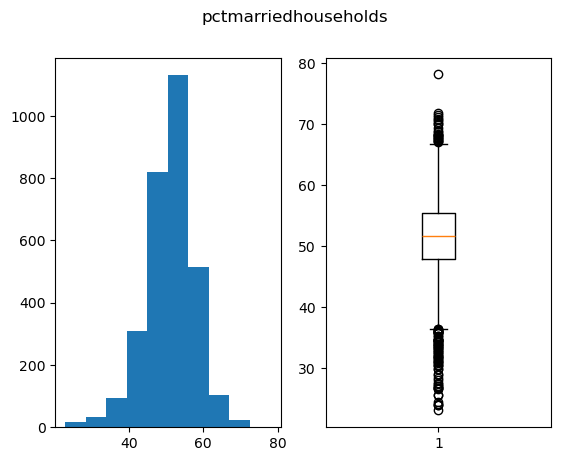

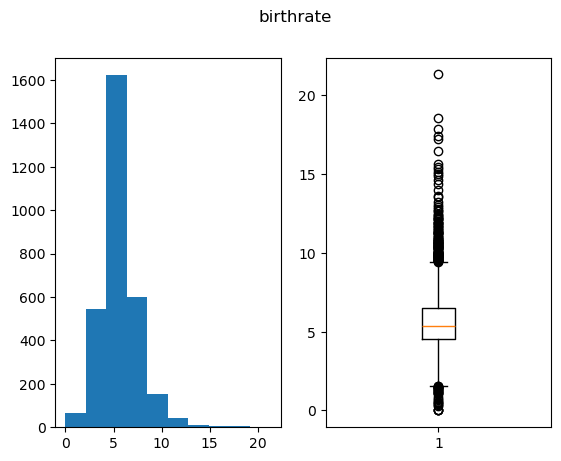

In [47]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

In [49]:
# replace outliers using IQR Winsorization
# replace lower outliers with lower fence
# replace upper outliers with upper fence

for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    lf = q1-1.5*iqr
    uf = q3+1.5*iqr
    df.loc[df[i]<lf, i]=lf
    df.loc[df[i]>uf, i]=uf

C:\Users\User\AppData\Local\Temp\ipykernel_14680\3276252233.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-153.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]<lf, i]=lf
C:\Users\User\AppData\Local\Temp\ipykernel_14680\3276252233.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '18468.25' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]<lf, i]=lf
C:\Users\User\AppData\Local\Temp\ipykernel_14680\3276252233.py:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-73796.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[i]<lf, i]=lf


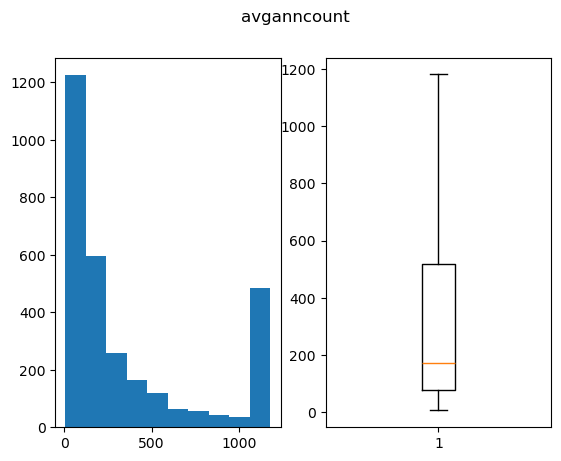

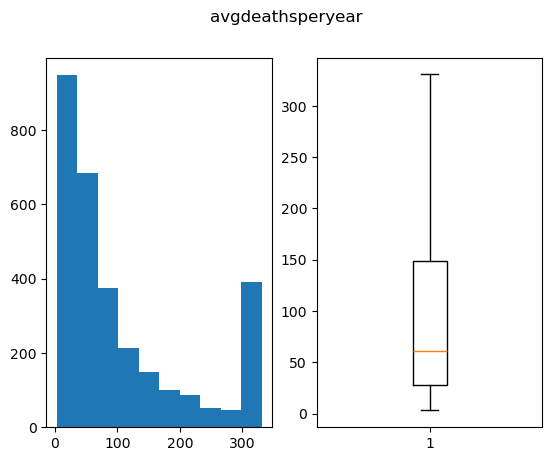

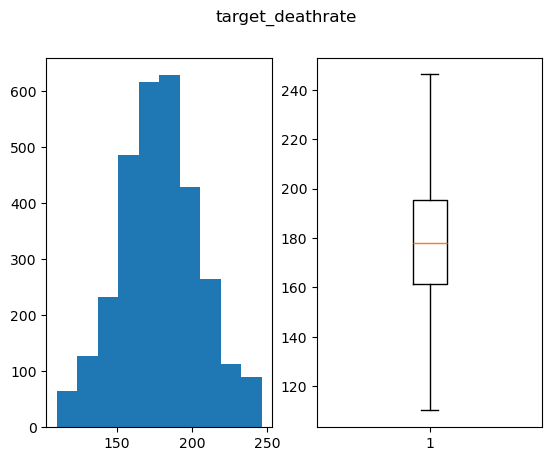

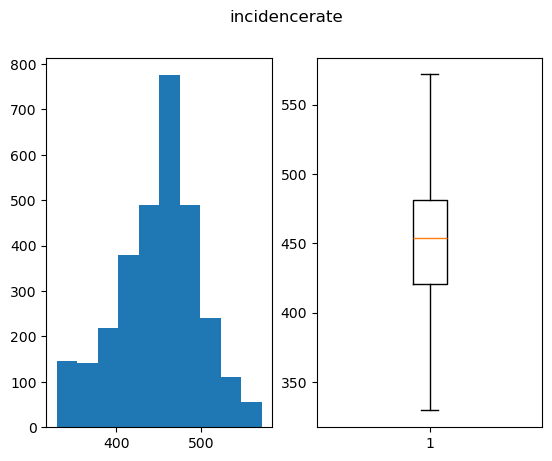

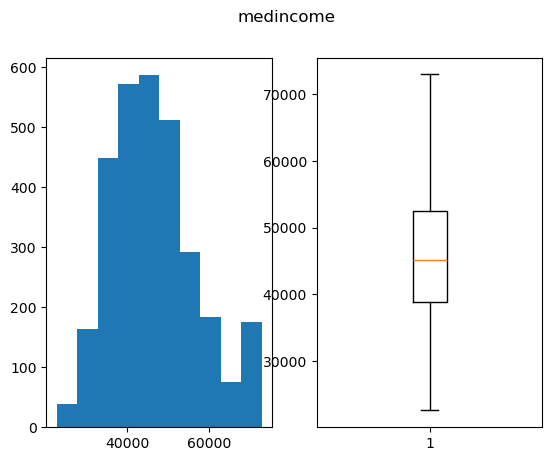

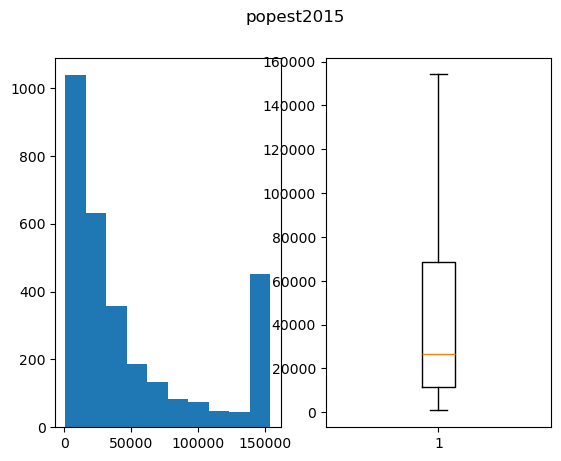

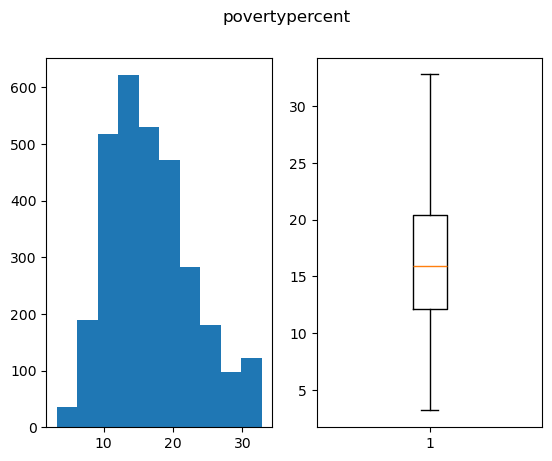

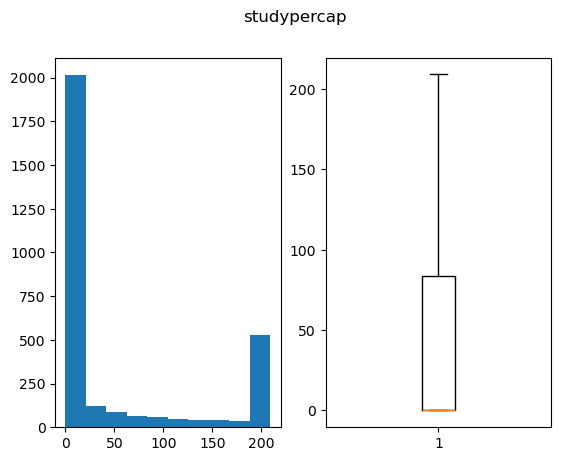

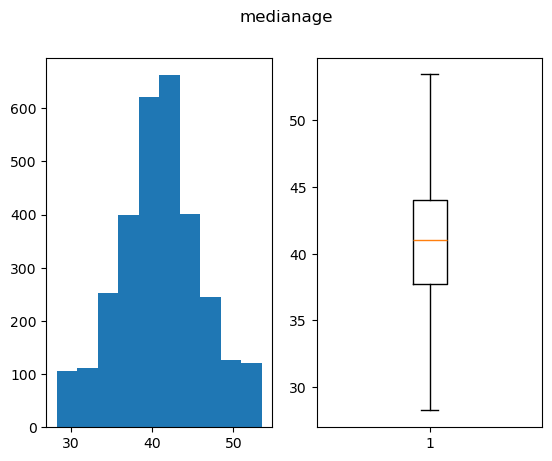

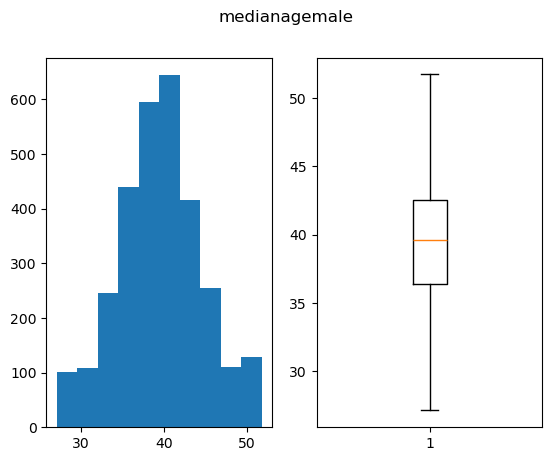

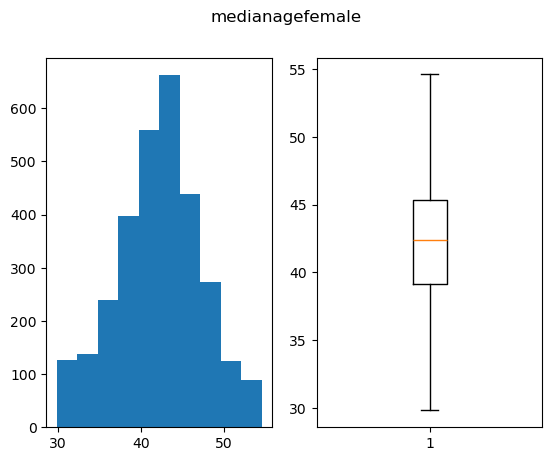

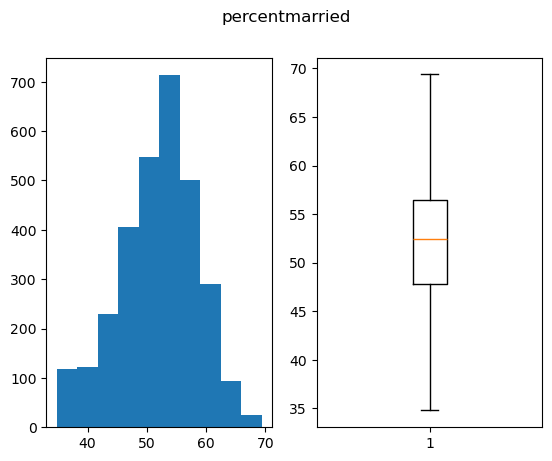

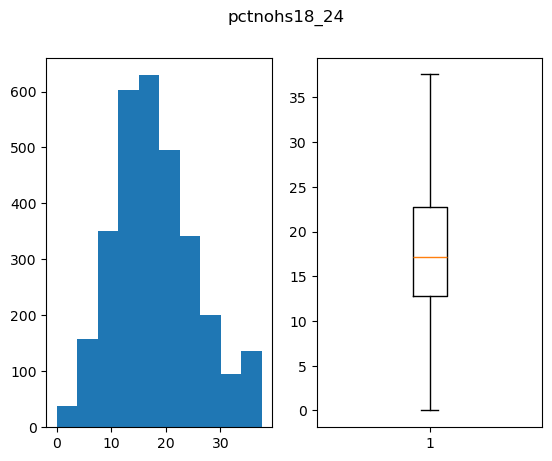

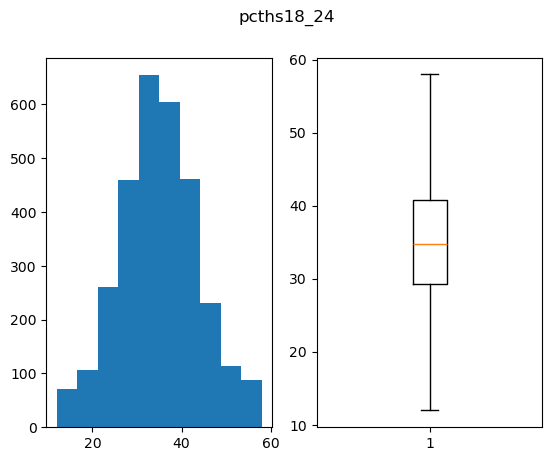

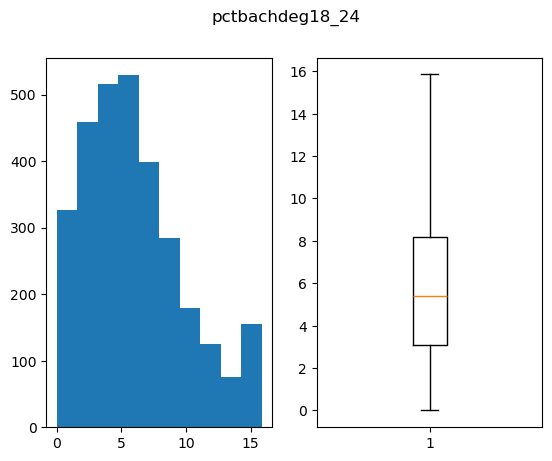

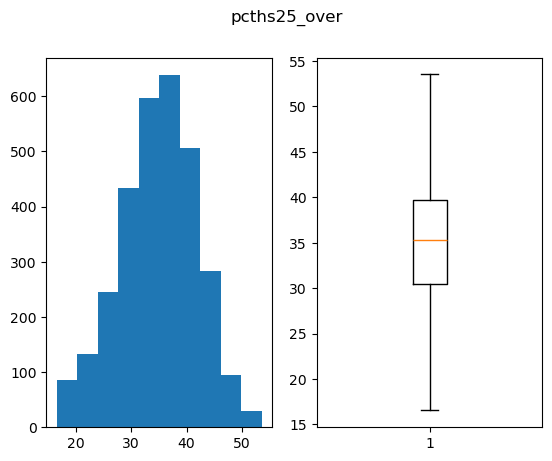

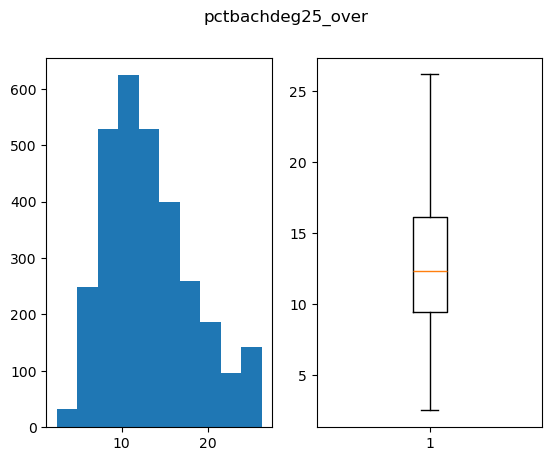

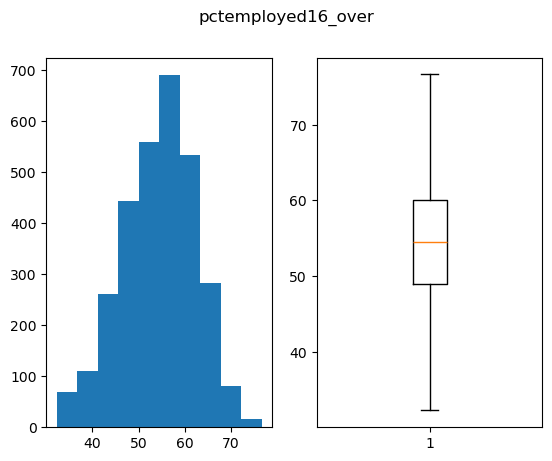

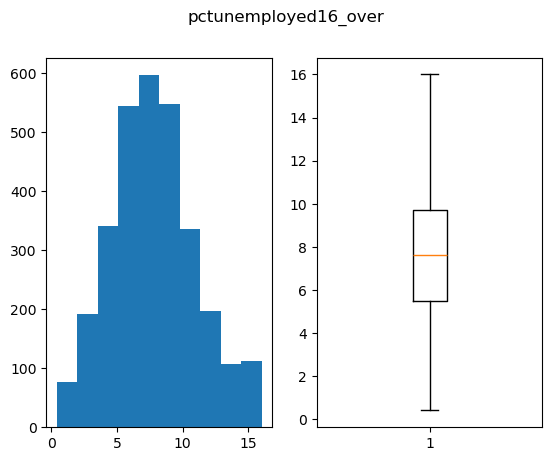

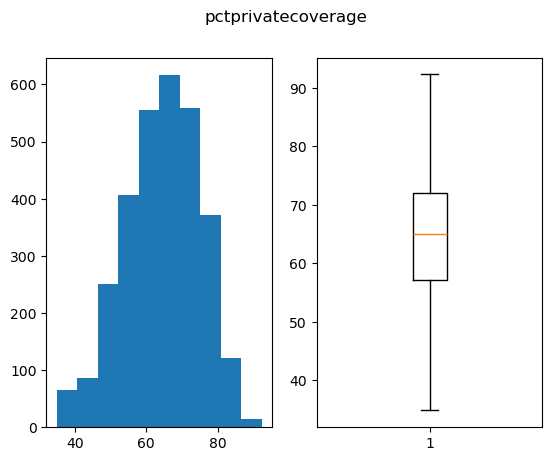

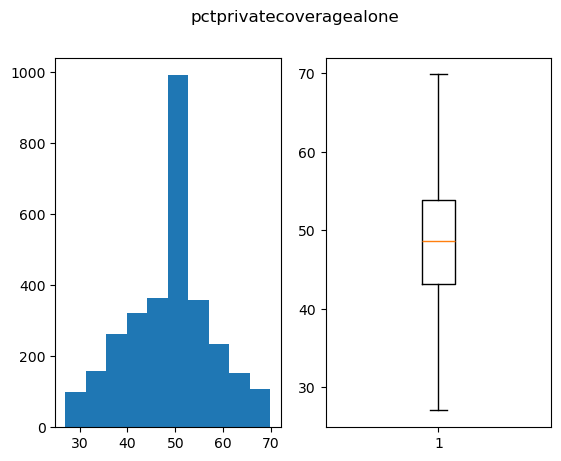

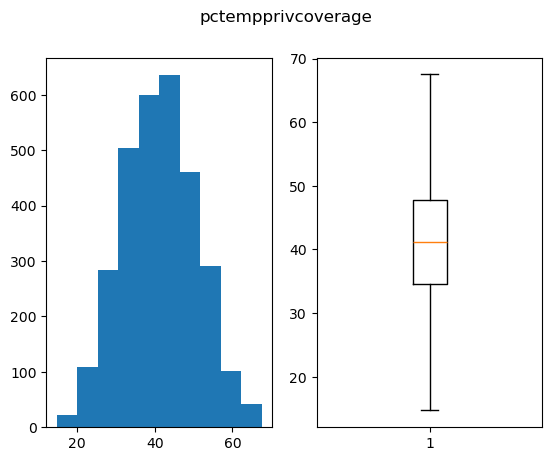

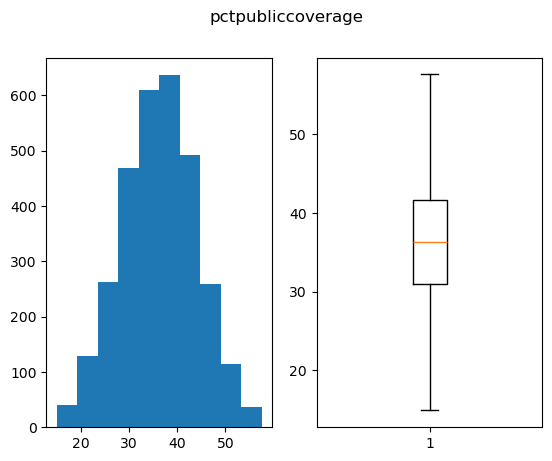

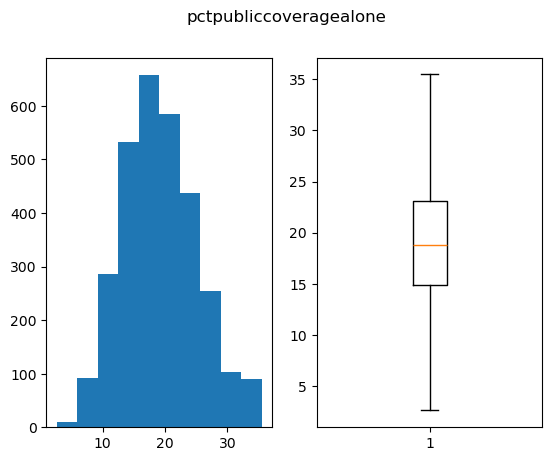

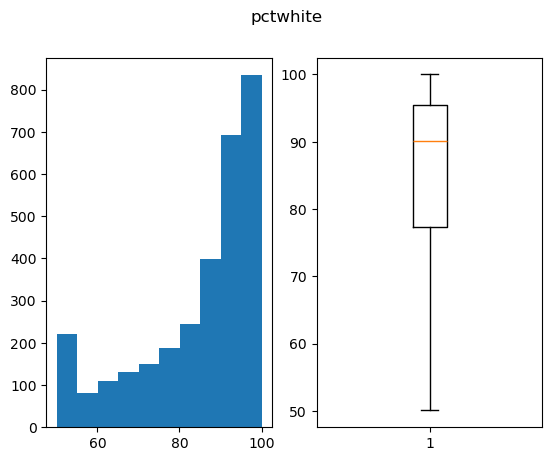

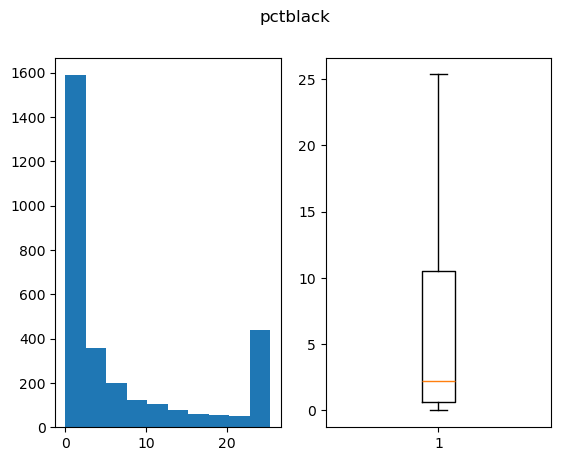

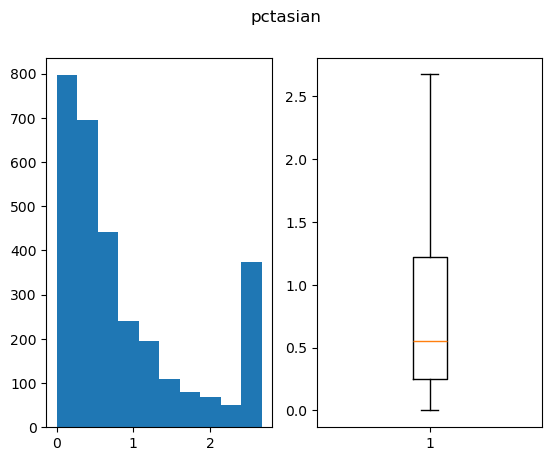

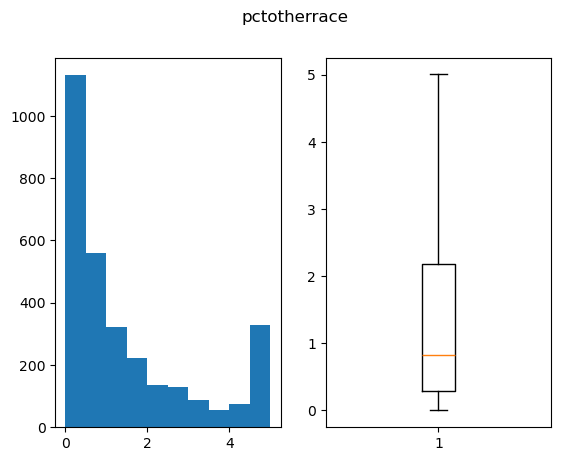

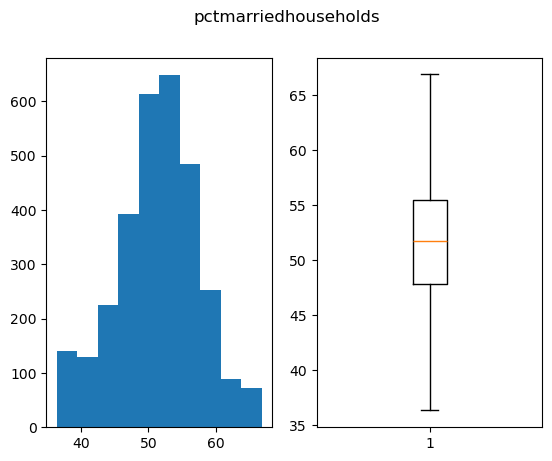

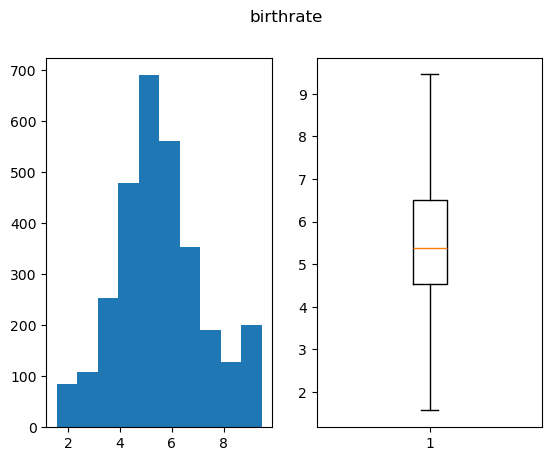

In [51]:
for i in num:
    fig, ax=plt.subplots(1,2) #1 row, 2 column
    ax[0].hist(df[i])
    ax[1].boxplot(df[i])
    # plt.title(i) -- title for boxplot only
    plt.suptitle(i)
    plt.show()

In [53]:
x_df = df.drop(['avgdeathsperyear'], axis = 1)  #Independent data
y= df['avgdeathsperyear'] #dependent data
x_df

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1181.0,164.9,489.800000,61898.0,154151.5,11.2,209.126941,39.30,36.900,41.7,...,48.7,41.6,32.9,14.0,81.780529,2.594728,2.671295,1.843479,52.856076,6.118831
1,173.0,161.3,411.600000,48127.0,43269.0,18.6,23.111234,33.00,32.200,33.7,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,174.7,349.700000,49348.0,21026.0,14.6,47.560164,45.00,44.000,45.8,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,194.8,430.400000,44243.0,75882.0,17.1,209.126941,42.80,42.200,43.4,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,144.4,350.100000,49955.0,10321.0,12.5,0.000000,48.30,47.800,48.9,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1181.0,149.6,453.549422,46961.0,6343.0,12.4,0.000000,44.20,41.100,48.8,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1181.0,150.1,453.549422,48609.0,37118.0,18.8,209.126941,30.40,29.300,31.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,2.671295,5.002143,52.007937,8.186470
3044,1181.0,153.9,453.549422,51144.0,34536.0,15.0,209.126941,30.90,30.500,31.2,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.002143,55.153949,7.809192
3045,1181.0,175.0,453.549422,50745.0,25609.0,13.3,0.000000,39.00,36.900,40.5,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [55]:
x = x_df.values
y = y.values

In [57]:
x

array([[1181.        ,  164.9       ,  489.8       , ...,    1.84347853,
          52.85607588,    6.11883103],
       [ 173.        ,  161.3       ,  411.6       , ...,    3.74135153,
          45.37250044,    4.33309558],
       [ 102.        ,  174.7       ,  349.7       , ...,    2.74735831,
          54.44486837,    3.72948782],
       ...,
       [1181.        ,  153.9       ,  453.5494221 , ...,    5.00214262,
          55.15394913,    7.80919168],
       [1181.        ,  175.        ,  453.5494221 , ...,    2.13179047,
          58.48423194,    7.58293839],
       [1181.        ,  213.6       ,  453.5494221 , ...,    1.35645744,
          56.04024208,    8.98172324]])

In [59]:
y

array([330.5,  70. ,  50. , ...,  46. ,  52. ,  48. ])

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.2, random_state=1) #80-20 select data randomly

In [63]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2437, 29)
(610, 29)
(2437,)
(610,)


In [65]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [67]:
y_train_pred = lr_model.predict(x_train)  

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [71]:
mse_t = mean_squared_error(y_train_pred, y_train)
rmse_t = mean_squared_error(y_train_pred, y_train)**0.5
mae_t = mean_absolute_error(y_train_pred, y_train)
r2_lin_train = r2_score(y_train, y_train_pred)

print(mse_t)
print(rmse_t)
print(mae_t)
print(r2_lin_train)

324.40152999328865
18.01115015742439
11.669338550178102
0.9700874428026279


In [73]:
y_test_pred = lr_model.predict(x_test)
mse_test = mean_squared_error(y_test_pred, y_test)
rmse_test = mean_squared_error(y_test_pred, y_test)**0.5
mae_test = mean_absolute_error(y_test_pred, y_test)
r2_lin_test = r2_score(y_test, y_test_pred)

print(mse_test)
print(rmse_test)
print(mae_test)
print(r2_lin_test)

326.3177744831934
18.064267892256066
11.941982611694254
0.97229123091825
